In [109]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


# Importing Required Libraries

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

# Data Collection

In [124]:
data = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Analysis

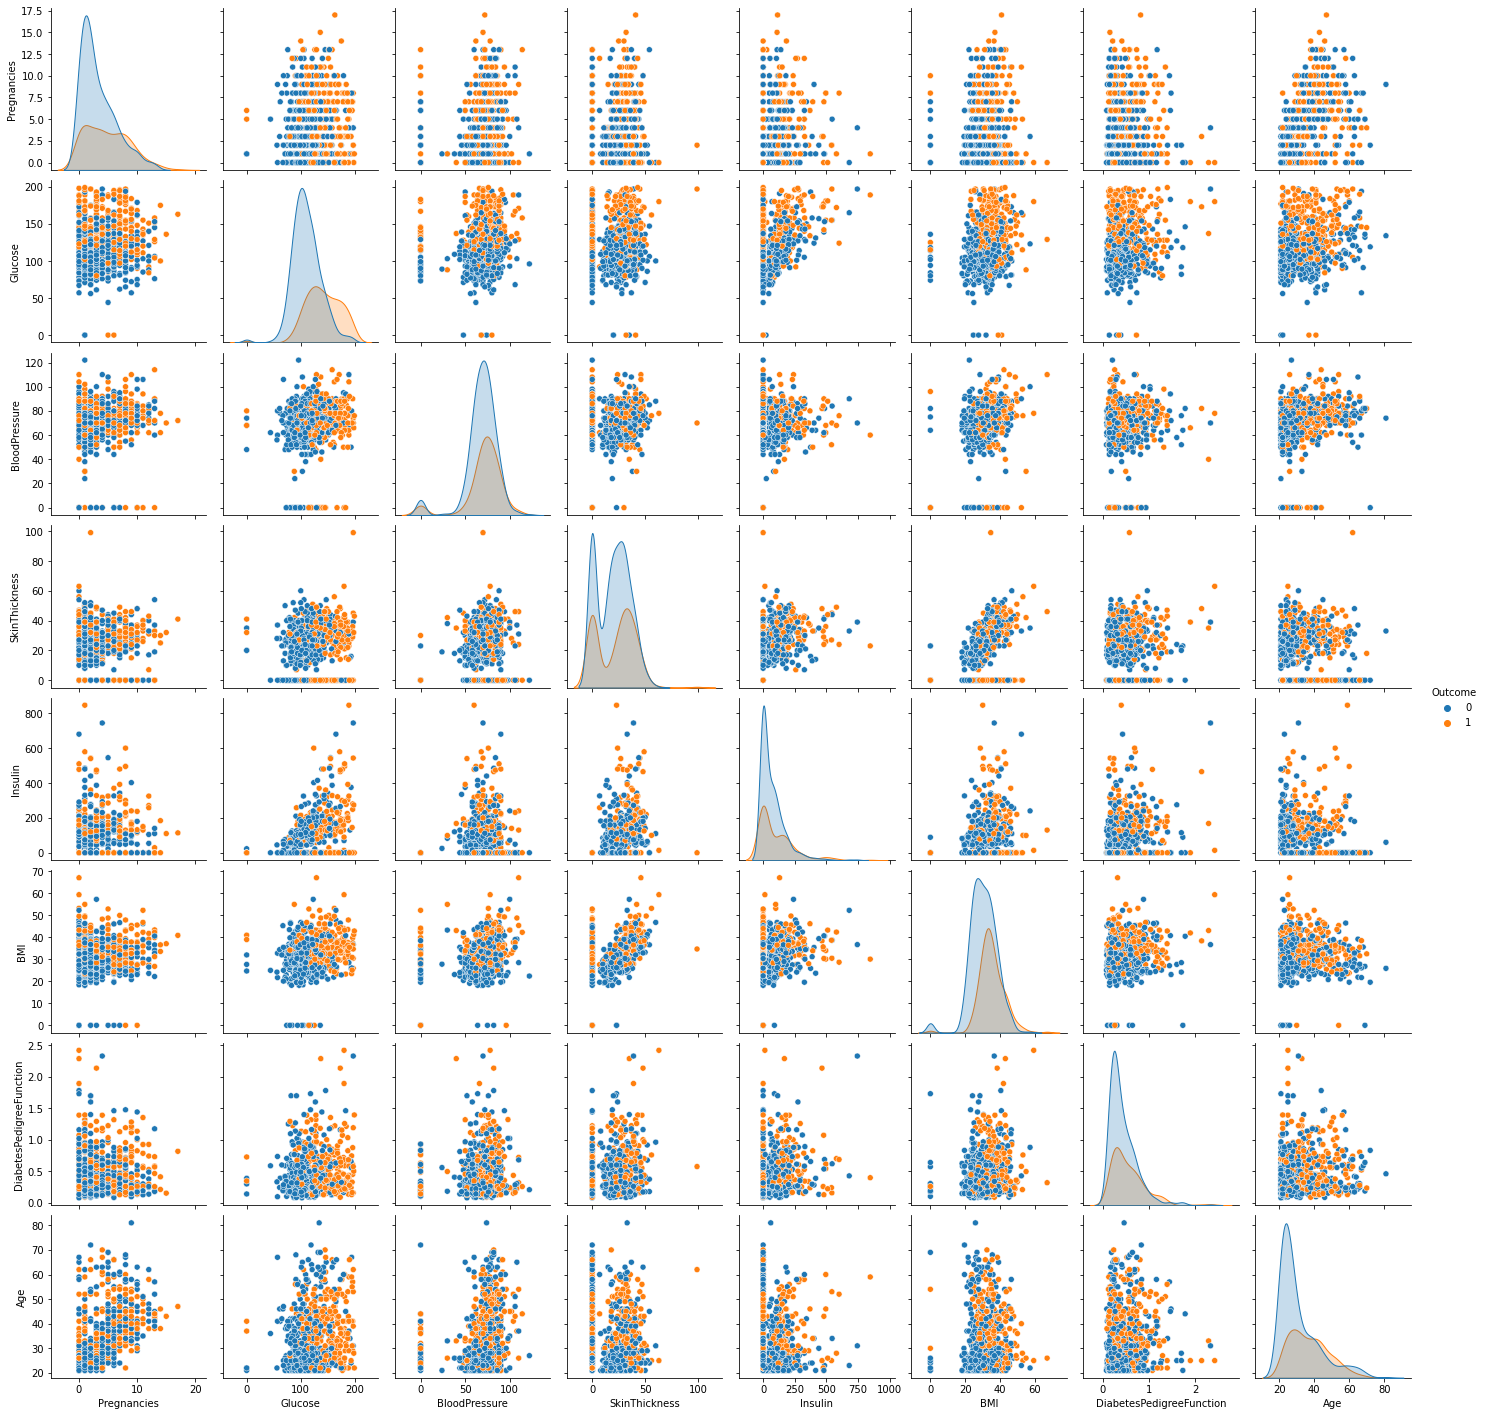

In [208]:
# analysis of the raw data

sns.pairplot(data, hue = "Outcome")

In [125]:
dataset = data.copy()
for col in dataset.columns[0:8]:
    dataset[col] = dataset[col]/abs(dataset[col].max())
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.259091,0.617284,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.145041,0.382716,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.277686,0.395062,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.069008,0.259259,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.945455,0.407407,1


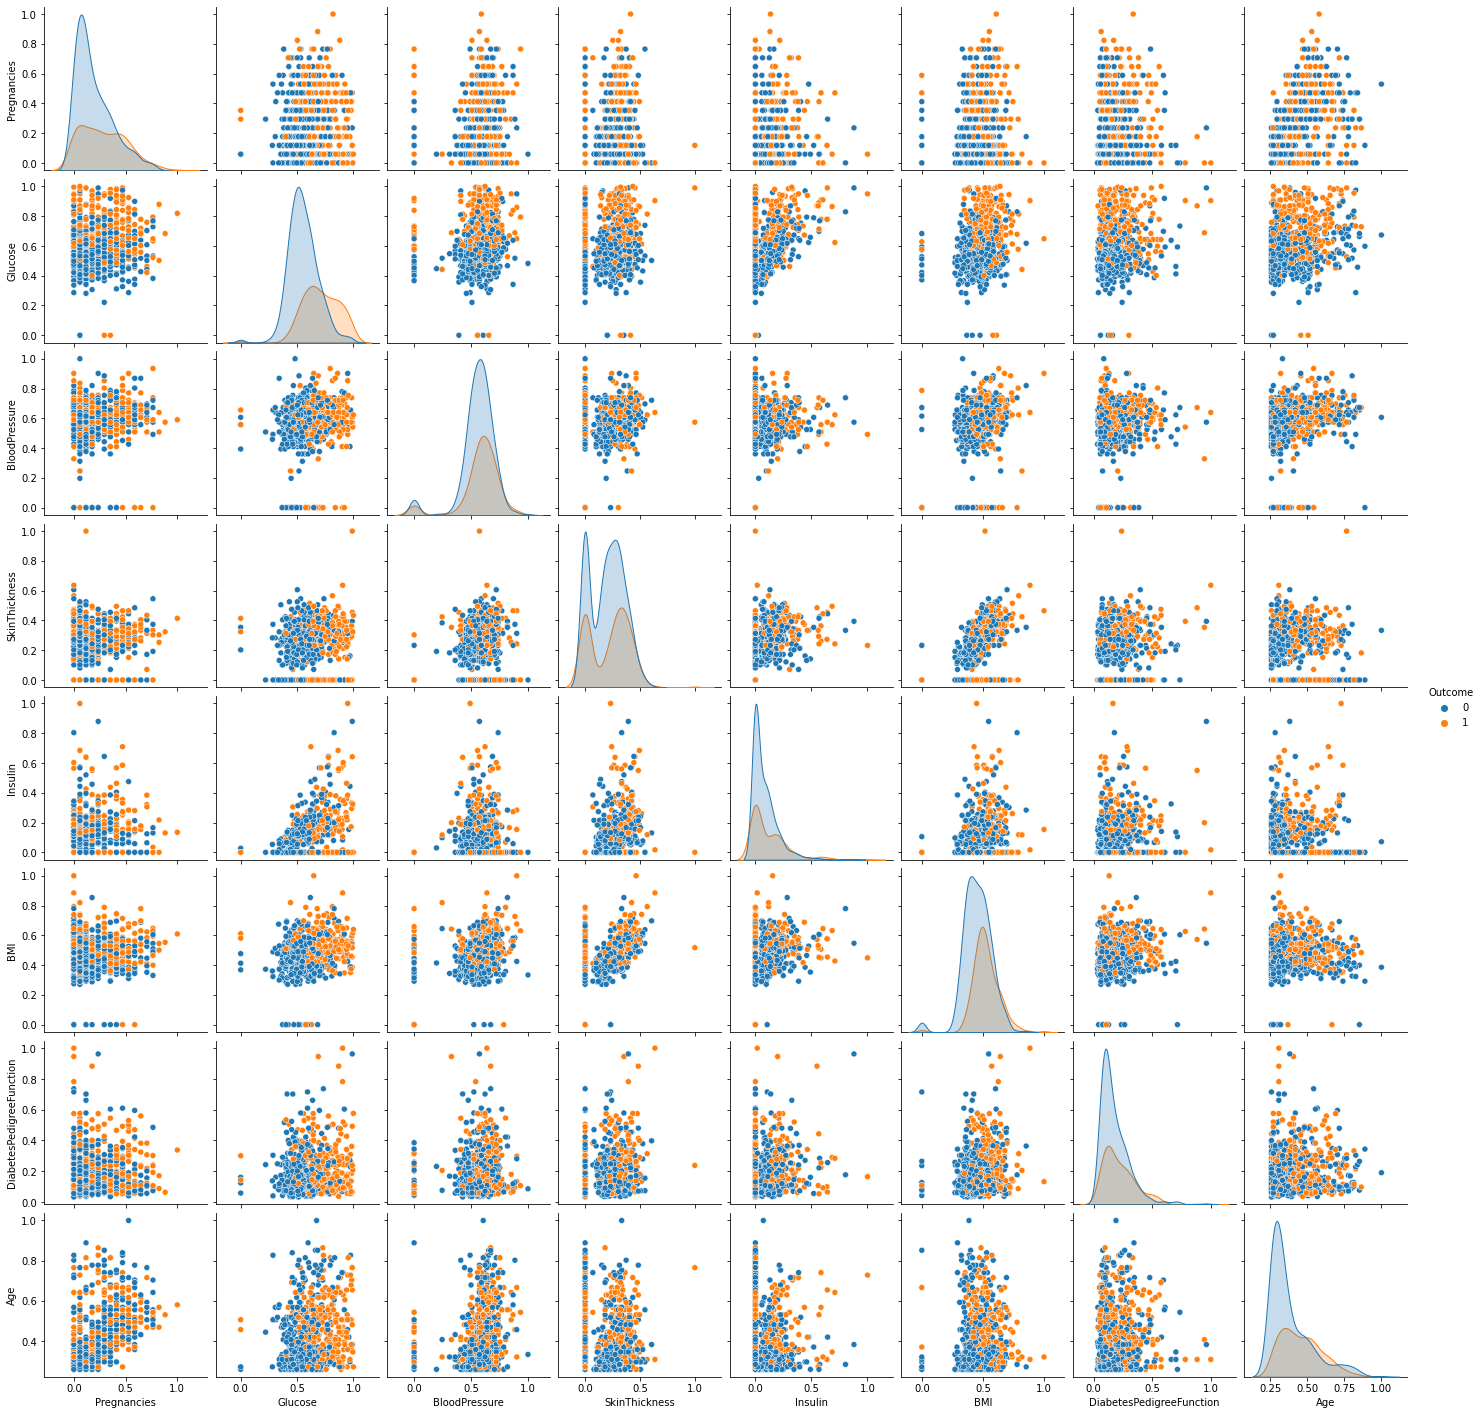

In [212]:
# analysis of the normalized data

sns.pairplot(dataset, hue="Outcome")

In [126]:
train, test = train_test_split(dataset, test_size=0.3, random_state=42, shuffle=True)

# Defining Important Functions

In [127]:
def makeinput(df):
    x = df.iloc[:, :-1].values
    y = df.iloc[:, -1]. values
    y = y.reshape(y.shape[0], 1)
    x0 = np.ones(x.shape[0]).reshape(x.shape[0], 1)
    x = np.append(x0, x, axis=1)
    return x, y

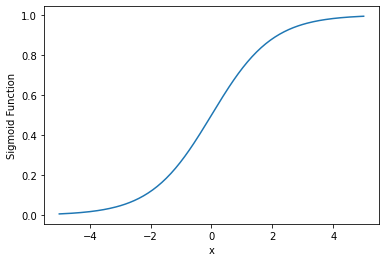

In [128]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

a = np.linspace(-5, 5, 200)
b = sigmoid(a)
plt.plot(a, b)
plt.xlabel("x")
plt.ylabel("Sigmoid Function")
plt.show()    

In [129]:
def hyp(theta, x):
    return np.matmul(x, theta)

In [161]:
def cost(theta, x, y):
    m = x.shape[0]
    h = hyp(theta, x)
    J = -1/(m) * np.sum(y*np.log(sigmoid(h)) + (1-y)*np.log(1-sigmoid(h)))
    return J

In [179]:
def grad(theta, x, y, alpha, epochs):
    m = x.shape[0]
    j = np.zeros(epochs)
    for i in range(epochs):
        h = hyp(theta,x)
        theta = theta - (alpha/m)*np.matmul(np.transpose(x), (sigmoid(h)-y))
        j[i] = cost(theta, x, y)
    return theta, j

In [187]:
def pred(theta, x):
    h = hyp(theta, x)
    return sigmoid(h)

# Training

In [180]:
# Initialization of coefficient

x_train, y_train = makeinput(train)
m, n = x_train.shape
theta = np.zeros((n, 1))

In [181]:
# Loss without optimization

loss = cost(theta, x_train, y_train)
print("Loss without optimization is " + str(loss))

Loss without optimization is 0.6931471805599453


In [198]:
# Optimization with GD

alpha = 0.01        # learning rate
epochs = 75000     # no of iterations to run the loop
theta, j = grad(theta, x_train, y_train, alpha, epochs)
loss_gd = cost(theta, x_train, y_train)

print("Loss after optimization is " + str(loss_gd))


Loss after optimization is 0.46325532524008045


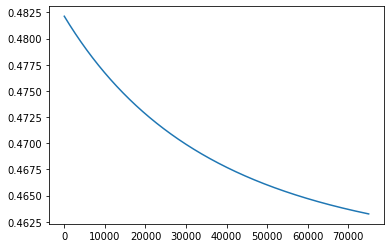

In [199]:
iteration = np.arange(0, epochs, 1)  
plt.plot(iteration, j)
plt.show()
    

# Predictions

In [200]:
x_test, y_test = makeinput(test)
y_test[80:90]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0]])

In [204]:

predictions = np.round(pred(theta, x_test))
predictions[80:90]

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.]])

# Results

In [205]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, predictions)

array([[122,  29],
       [ 32,  48]])

In [207]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.62      0.60      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.73      0.74      0.73       231

